# Import

In [123]:
import sys
nephosemdir = "D:/OneDrive - KU Leuven/KUL/nephosem"
tokens_coordinates_dir = 'tokens_coordinates'
SOC_analysis_dir = 'SOC_analysis'

sys.path.append(nephosemdir)
sys.path.append(tokens_coordinates_dir)
sys.path.append(SOC_analysis_dir)

mydir = f"./"

In [124]:
# tokens_coordinates
import get_model_data
import get_token_ids
import importlib
# Import the module before reloading
importlib.reload(get_token_ids)
importlib.reload(get_model_data)

<module 'get_model_data' from 'd:\\OneDrive - KU Leuven\\KUL\\SOCFlow\\tokens_coordinates\\get_model_data.py'>

In [125]:
# Nephosem
from nephosem import ConfigLoader, TypeTokenMatrix
conf = ConfigLoader()
settings = conf.update_config('config.ini')

In [126]:
# SOC_analysis
import SOC_analysis
import importlib
# Import the module before reloading
importlib.reload(SOC_analysis)

<module 'SOC_analysis' from 'd:\\OneDrive - KU Leuven\\KUL\\SOCFlow\\SOC_analysis\\SOC_analysis.py'>

In [127]:
analyser = SOC_analysis.SOCAnalyser()

token = 'freedom'
model = 'freedom.nobound3-3NVAA.PPMIno.LENGTH5000.SOCPOSNVAA'
input_folder = './input/'
output_folder = './output/'

# Get the coordinates of the tokens

In [128]:
# Get the distance matrix for calculating HDBSCAN
distance_matrix = TypeTokenMatrix.load(f'{input_folder}/{model}.ttmx.dist.pac')
distance_matrix.to_csv(f'{input_folder}/{model}.ttmx.dist.csv', sep=',')
print(f'Distance matrix saved to {input_folder}/{model}.ttmx.dist.csv')

Distance matrix saved to ./input//freedom.nobound3-3NVAA.PPMIno.LENGTH5000.SOCPOSNVAA.ttmx.dist.csv


In [129]:
# Get the coordinates and other information (incl. HDBSCAN) of the tokens of the model.

# get_model_data.get_model_data(token=token, model=model, input_folder=input_folder, min_cluster_size = 8, min_samples = 8) # Calculate HDBSCAN clusters using distance matrix
get_model_data.get_model_data(token=token, model=model, input_folder=input_folder, source='semcloud') # Use available HDBSCAN results from semcloud

The coordinates of freedom-freedom.nobound3-3NVAA.PPMIno.LENGTH5000.SOCPOSNVAA were extracted
Updated t-SNE file saved to ./input/visualisation\freedom-freedom.nobound3-3NVAA.PPMIno.LENGTH5000.SOCPOSNVAA.tsne.30.tsv
No-noise t-SNE file saved to ./input/visualisation\no_noise-freedom-freedom.nobound3-3NVAA.PPMIno.LENGTH5000.SOCPOSNVAA.tsne.30.tsv
The additional information for freedom-freedom.nobound3-3NVAA.PPMIno.LENGTH5000.SOCPOSNVAA was added successfully.
The model data was extracted


In [130]:
# Visualisation to get the token ids
get_token_ids.get_token_ids(token, model, input_folder, mode='nonoise')

Open the app in your browser (http://127.0.0.1:5898).


# Get the sub-matrix of the SOC matrix

In [131]:
# List of tokens copied from the token_coordinate
token_list = ['freedom/nn1/fic_1992_40311_cleaned_part92/39', 'freedom/nn1/fic_1993_1040060_cleaned_part922/4', 'freedom/nn1/fic_1993_1040095_cleaned_part320/43', 'freedom/nn1/fic_1993_25030_cleaned_part372/41', 'freedom/nn1/fic_1994_41215_cleaned_part86/57', 'freedom/nn1/fic_1994_41228_cleaned_part60/45', 'freedom/nn1/fic_1994_54046_cleaned_part7/85', 'freedom/nn1/fic_1994_54078_cleaned_part134/13', 'freedom/nn1/fic_1995_39252_cleaned_part23/77', 'freedom/nn1/fic_1995_39352_cleaned_part234/6', 'freedom/nn1/fic_1995_39372_cleaned_part153/83', 'freedom/nn1/fic_1995_39397_cleaned_part106/11', 'freedom/nn1/fic_1995_39512_cleaned_part284/26', 'freedom/nn1/fic_1996_54286_cleaned_part22/44', 'freedom/nn1/fic_1996_54389_cleaned_part188/13', 'freedom/nn1/fic_1997_32977_cleaned_part8/75', 'freedom/nn1/fic_1997_42212_cleaned_part244/27', 'freedom/nn1/fic_1997_54639_cleaned_part163/17', 'freedom/nn1/fic_1998_32277_cleaned_part21/35', 'freedom/nn1/fic_1998_43415_cleaned_part29/37', 'freedom/nn1/fic_1998_44210_cleaned_part24/39', 'freedom/nn1/fic_1998_44210_cleaned_part98/46', 'freedom/nn1/fic_1998_44223_cleaned_part13/38', 'freedom/nn1/fic_1999_44245_cleaned_part41/54', 'freedom/nn1/fic_1999_44505_cleaned_part117/14', 'freedom/nn1/fic_1999_45413_cleaned_part43/22', 'freedom/nn1/fic_1999_55360_cleaned_part58/25', 'freedom/nn1/fic_1999_55365_cleaned_part106/52', 'freedom/nn1/fic_2000_29169_cleaned_part76/72', 'freedom/nn1/fic_2000_29219_cleaned_part23/67', 'freedom/nn1/fic_2000_30580_cleaned_part37/53', 'freedom/nn1/fic_2000_38540_cleaned_part115/31', 'freedom/nn1/fic_2002_30470_cleaned_part149/134', 'freedom/nn1/fic_2002_31970_cleaned_part6/15', 'freedom/nn1/fic_2002_46765_cleaned_part52/22', 'freedom/nn1/fic_2003_28631_cleaned_part39/58', 'freedom/nn1/fic_2004_49005_cleaned_part3/63', 'freedom/nn1/fic_2005_30423_cleaned_part54/50', 'freedom/nn1/fic_2005_31478_cleaned_part3/62', 'freedom/nn1/fic_2005_32132_cleaned_part20/2', 'freedom/nn1/fic_2005_50112_cleaned_part33/54', 'freedom/nn1/fic_2006_28389_cleaned_part34/6', 'freedom/nn1/fic_2006_31492_cleaned_part1/25', 'freedom/nn1/fic_2006_31492_cleaned_part27/34', 'freedom/nn1/fic_2006_31509_cleaned_part3/19', 'freedom/nn1/fic_2007_33446_cleaned_part9/7', 'freedom/nn1/fic_2007_33482_cleaned_part28/103', 'freedom/nn1/fic_2007_34319_cleaned_part21/29', 'freedom/nn1/fic_2007_34420_cleaned_part9/62', 'freedom/nn1/fic_2008_36134_cleaned_part26/49', 'freedom/nn1/fic_2008_36315_cleaned_part23/20', 'freedom/nn1/fic_2008_36316_cleaned_part10/37', 'freedom/nn1/fic_2009_36618_cleaned_part18/14', 'freedom/nn1/fic_2009_36624_cleaned_part52/40', 'freedom/nn1/mag_1990_339860_cleaned_part3/10', 'freedom/nn1/mag_1990_419794_cleaned_part3/60', 'freedom/nn1/mag_1990_420727_cleaned_part94/25', 'freedom/nn1/mag_1990_421514_cleaned_part5/159', 'freedom/nn1/mag_1991_387449_cleaned_part87/30', 'freedom/nn1/mag_1992_394673_cleaned_part94/37', 'freedom/nn1/mag_1993_396008_cleaned_part11/37', 'freedom/nn1/mag_1994_351590_cleaned_part4/95', 'freedom/nn1/mag_1994_393651_cleaned_part27/44', 'freedom/nn1/mag_1994_409088_cleaned_part38/44', 'freedom/nn1/mag_1994_410158_cleaned_part30/11', 'freedom/nn1/mag_1994_410748_cleaned_part18/49', 'freedom/nn1/mag_1994_425559_cleaned_part38/154', 'freedom/nn1/mag_1994_425606_cleaned_part9/4', 'freedom/nn1/mag_1995_426994_cleaned_part14/62', 'freedom/nn1/mag_1996_429149_cleaned_part25/15', 'freedom/nn1/mag_1997_386701_cleaned_part28/151', 'freedom/nn1/mag_1998_402027_cleaned_part47/11', 'freedom/nn1/mag_1999_399296_cleaned_part59/5', 'freedom/nn1/mag_1999_399392_cleaned_part21/76', 'freedom/nn1/mag_1999_407430_cleaned_part55/18', 'freedom/nn1/mag_1999_407884_cleaned_part189/7', 'freedom/nn1/mag_2000_367008_cleaned_part5/62', 'freedom/nn1/mag_2001_416863_cleaned_part50/45', 'freedom/nn1/mag_2001_417140_cleaned_part9/51', 'freedom/nn1/mag_2002_385037_cleaned_part40/77', 'freedom/nn1/mag_2003_387019_cleaned_part5/98', 'freedom/nn1/mag_2003_402044_cleaned_part16/64', 'freedom/nn1/mag_2003_407768_cleaned_part11/5', 'freedom/nn1/mag_2003_407768_cleaned_part5/77', 'freedom/nn1/mag_2004_363687_cleaned_part8/33', 'freedom/nn1/mag_2005_379674_cleaned_part1/64', 'freedom/nn1/mag_2005_396826_cleaned_part6/50', 'freedom/nn1/mag_2006_383690_cleaned_part11/52', 'freedom/nn1/news_1995_638710_cleaned_part15/23', 'freedom/nn1/news_1998_626750_cleaned_part7/22', 'freedom/nn1/news_1999_639373_cleaned_part38/42', 'freedom/nn1/news_1999_639373_cleaned_part9/73', 'freedom/nn1/news_2002_634176_cleaned_part21/32', 'freedom/nn1/news_2003_617150_cleaned_part20/164', 'freedom/nn1/news_2003_623037_cleaned_part24/75', 'freedom/nn1/news_2006_618149_cleaned_part18/88', 'freedom/nn1/news_2006_629431_cleaned_part10/53', 'freedom/nn1/nf_1993_774078_cleaned_part259/146', 'freedom/nn1/nf_1995_773426_cleaned_part119/118', 'freedom/nn1/nf_1995_773714_cleaned_part53/55', 'freedom/nn1/nf_1995_773909_cleaned_part219/34', 'freedom/nn1/nf_1998_773548_cleaned_part108/74', 'freedom/nn1/nf_1998_773596_cleaned_part162/76', 'freedom/nn1/nf_1998_775155_cleaned_part37/29', 'freedom/nn1/nf_1998_775249_cleaned_part34/122', 'freedom/nn1/nf_1999_774953_cleaned_part38/76', 'freedom/nn1/nf_1999_775053_cleaned_part6/108', 'freedom/nn1/nf_2002_776266_cleaned_part96/78', 'freedom/nn1/nf_2004_747059_cleaned_part42/97', 'freedom/nn1/nf_2007_775307_cleaned_part52/62', 'freedom/nn1/nf_2009_774612_cleaned_part5/15', 'freedom/nn1/nf_2009_774633_cleaned_part62/117', 'freedom/nn2/fic_2007_52369_cleaned_part49/17', 'freedom/nn2/mag_1995_396719_cleaned_part50/67', 'freedom/nn2/news_1993_630369_cleaned_part13/25']

# Name of the region
region = 'freedom_64'

In [132]:
# Get the full SOC matrix
model_file = f'{input_folder}{model}.tcmx.soc.pac'
model_mtx = TypeTokenMatrix.load(model_file) # opens a matrix

# Get the submatrix of only the tokens under investigation
subset_rows = model_mtx.submatrix(row = token_list)
subset_rows.to_csv(f'{input_folder}{region}_SOCs.csv', sep=',')

In [134]:
# List of POS tags
POS_name = 'Verb'
POS_list = ['/v']
RegSOC_file = 'input/freedom_64_SOCs.csv'
sub_regSOC = 'freedom_64' # Name of the region

# Get the submatrix of only the POS tags
SOC_analysis.get_POS_submtx(RegSOC_file=RegSOC_file, sub_regSOC=sub_regSOC, POS_list=POS_list, output_folder=output_folder, POS_name=POS_name)

Filtered SOC matrix saved to: ./output/freedom_64_Verb_SOCs.csv


# SOC Analysis

Elbow index: 32
Elbow SOC: wave/vvd (Association Score: 0.0005030676935040519)


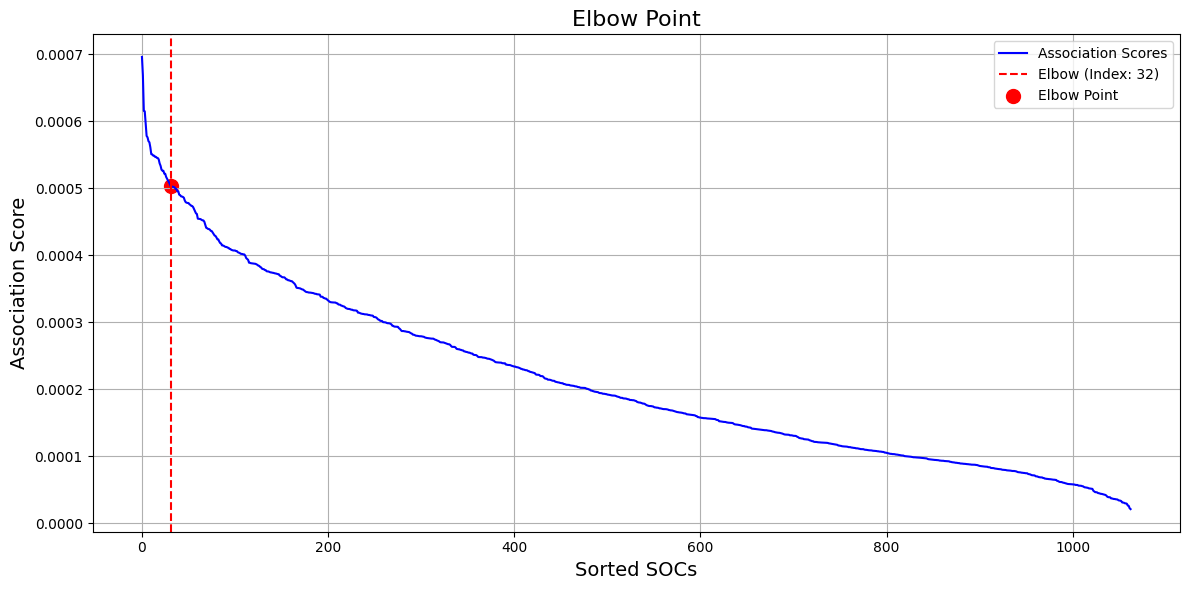

In [136]:
# Choose the submatrix
sub_RegSOC = 'freedom_64' # Name of the region
sub_regSOC_file = 'output/freedom_64_Verb_SOCs.csv'
mode = 'avg'

# Find the elbow
analyser.elbow_finder(region=region, sub_regSOC_file=sub_regSOC_file, mode=mode)

In [138]:
# Top n SOCs
n = 32
analyser.SOC_dist_vis(n=n, sub_regSOC=sub_regSOC, output_folder=output_folder, mode=mode, POS_name=POS_name)

Top 32 SOCs extracted and saved to: ./output/freedom_64-avg-top_32-Verb_SOCs.csv


In [139]:
# Get the raw context for the tokens
analyser.get_context(token=token, region=region, token_list=token_list, input_folder=input_folder, output_folder=output_folder)

Context for freedom-freedom_64 extracted and saved to ./output/freedom-freedom_64_context.csv.
